In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
data = pd.read_csv('C:/Users/afzal/Downloads/Titanic-Dataset.csv')


In [81]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [82]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [83]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [84]:
data.fillna('N/A', inplace=True)

C:\Users\afzal\AppData\Local\Temp\ipykernel_21560\1803298752.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna('N/A', inplace=True)


In [85]:
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


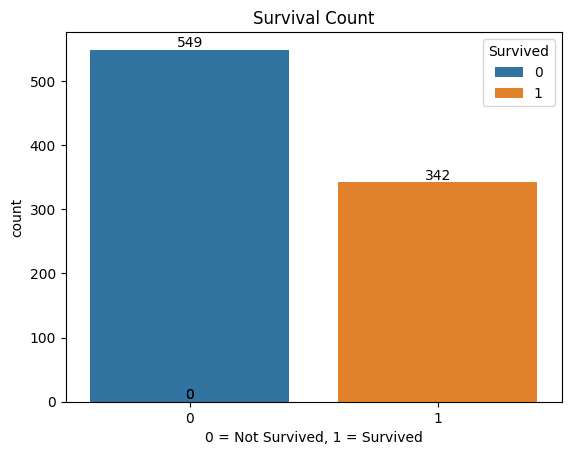

In [86]:
sns.countplot(x='Survived', data=data, hue='Survived', dodge=False, palette=['#1f77b4', '#ff7f0e'])  
plt.title('Survival Count')
plt.xlabel('0 = Not Survived, 1 = Survived') 

for p in plt.gca().patches:
    height = p.get_height()
    count_label = int(height)
    plt.gca().annotate(f'{count_label}', 
                       (p.get_x() + p.get_width() / 2, height), 
                       ha='center', va='bottom')

plt.show()



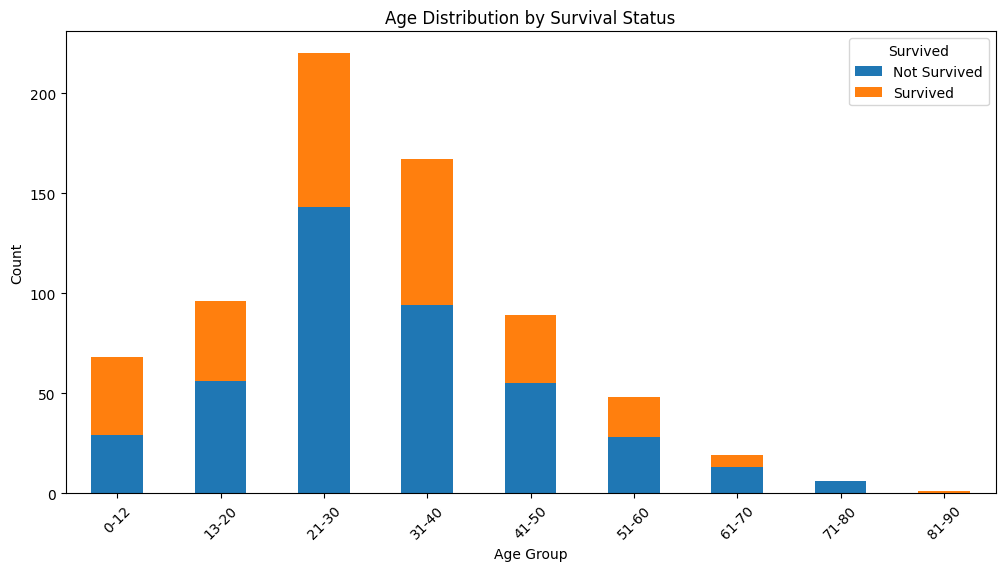

In [87]:

data['Age'] = pd.to_numeric(data['Age'], errors='coerce')


age_bins = [0, 12, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-12', '13-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

age_distribution = data.groupby(['AgeGroup', 'Survived'], observed=True).size().unstack(fill_value=0)

age_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

plt.grid(False)

plt.show()





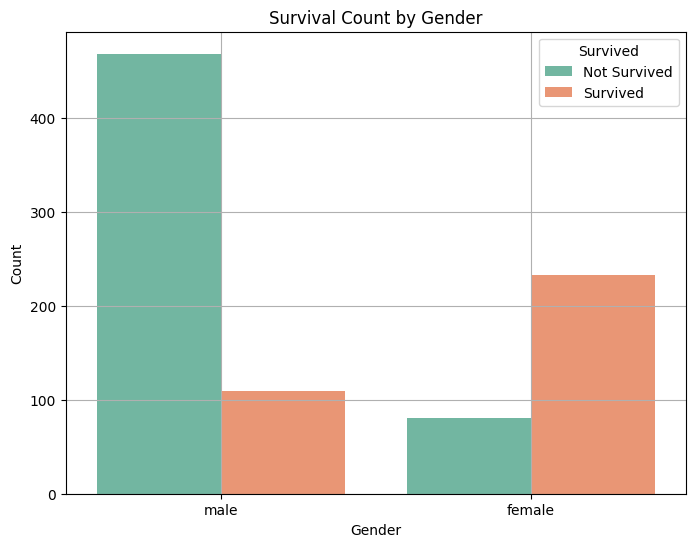

In [88]:
plt.figure(figsize=(8, 6))

sns.countplot(x='Sex', hue='Survived', data=data, palette='Set2')

plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.grid(True)
plt.show()

In [89]:

X = data.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])
y = data['Survived']


print(X.head())


   Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked AgeGroup
0       3    male  22.0      1      0   7.2500   N/A        S    21-30
1       1  female  38.0      1      0  71.2833   C85        C    31-40
2       3  female  26.0      0      0   7.9250   N/A        S    21-30
3       1  female  35.0      1      0  53.1000  C123        S    31-40
4       3    male  35.0      0      0   8.0500   N/A        S    31-40


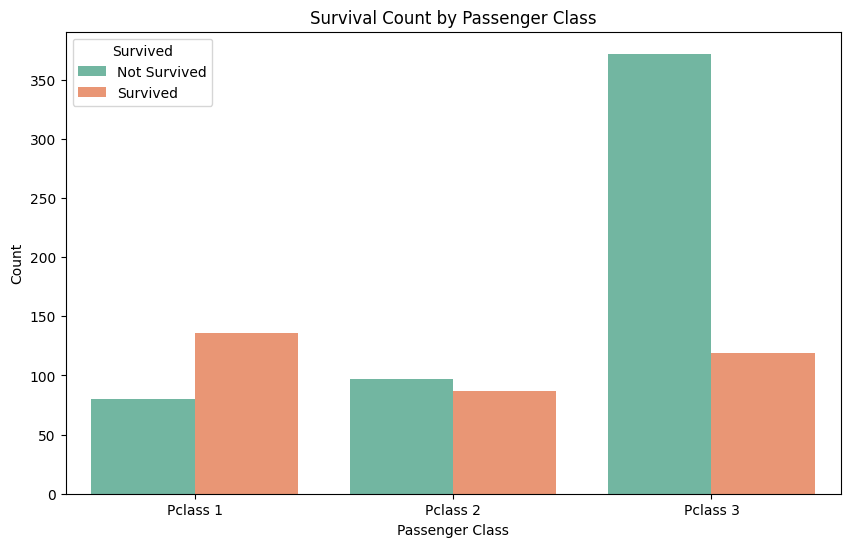

In [90]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Pclass', hue='Survived', data=data, palette='Set2')

plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Pclass 1', 'Pclass 2', 'Pclass 3'])  # Adjust labels for clarity
plt.legend(title='Survived', loc='upper left', labels=['Not Survived', 'Survived'])
plt.show()

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [92]:

data = pd.read_csv('C:/Users/afzal/Downloads/Titanic-Dataset.csv')

print(data.head())
print(data.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [93]:
data.fillna({'Age': data['Age'].median(), 'Embarked': 'S'}, inplace=True)

print(data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [94]:
categorical_columns = ['Sex', 'Embarked']  
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


print(data.select_dtypes(include=['object']).columns)


Index(['Name', 'Ticket', 'Cabin'], dtype='object')


In [95]:

X = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId']) 
y = data['Survived']

print(X.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    bool   
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 37.5 KB
None


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)


In [98]:

model = LogisticRegression()
model.fit(X_train_scaled, y_train)  


LogisticRegression()

In [99]:

y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)


class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Accuracy: 0.81
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



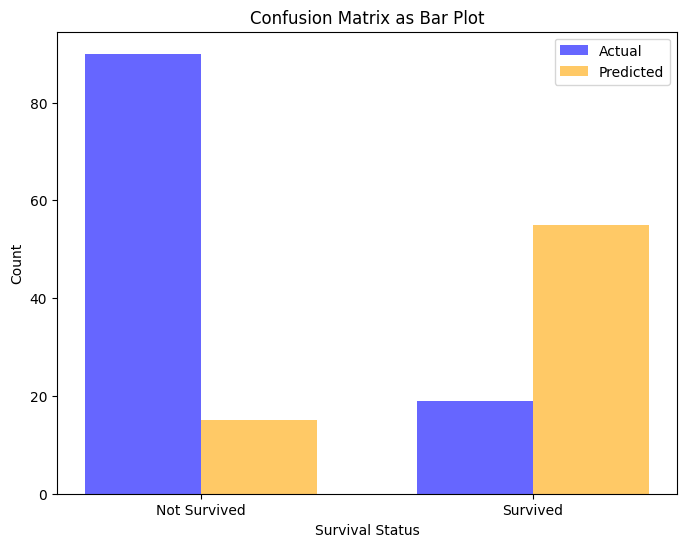

In [100]:
TN, FP, FN, TP = conf_matrix.ravel()

labels = ['Not Survived', 'Survived']
actual_counts = [TN, FN]  
predicted_counts = [FP, TP] 

x = np.arange(len(labels))

plt.figure(figsize=(8, 6))
bar_width = 0.35
plt.bar(x - bar_width/2, actual_counts, width=bar_width, label='Actual', color='blue', alpha=0.6)
plt.bar(x + bar_width/2, predicted_counts, width=bar_width, label='Predicted', color='orange', alpha=0.6)

plt.title('Confusion Matrix as Bar Plot')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks(x, ['Not Survived', 'Survived'])
plt.legend()
plt.show()


In [101]:

new_data = pd.DataFrame({
    'Pclass': [3],
    'Sex_male': [1],  # 1 for male, 0 for female
    'Age': [22],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked_S': [1]  # 1 for S, 0 for C or Q
})


new_data = new_data.reindex(columns=X.columns, fill_value=0)


new_data_scaled = scaler.transform(new_data)


new_predictions = model.predict(new_data_scaled)
print('Predicted Survival:', 'Survived' if new_predictions[0] == 1 else 'Not Survived')


Predicted Survival: Not Survived


In [ ]:
#TASK1_COMPLETED

In [ ]:
#THANKYOU!!!!!1